# STAT 207 Homework 6 [25 points]

## Hypothesis Testing

Due: Friday, March 1, end of day (11:59 pm CT)

<hr>

## Imports 

Run the following code cell to import the necessary packages into the file.  You may import additional packages, as needed for this assignment.

In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import statsmodels.formula.api as smf
import numpy as np

## Case Study: Colleges and Universities

We will use a random sample of post-secondary education facilities (colleges & universities) from the United States, including Puerto Rico & other US territories.  The **colleges.csv** file contains a random sample of 135 post-secondary education facilities from the US.  This data originally were obtained from: https://www.kaggle.com/yamqwe/colleges-and-universitiese
although the specific data is no longer available through this link.

We will focus on a few variables in particular:

- the categorization of the school (`NAICS_DESC`)
- the total number of students enrolled (`TOT_ENROLL`)

## 1. Read and prepare the data [1 point] 

**a)** You should read in the data from the **colleges.csv** file.

In [145]:
df = pd.read_csv("colleges.csv")

**b)** Perform any data cleaning that needs to take place.

**Hint:** For the data cleaning, we only care about the 2 variables defined above.  Consider possible values for the `TOT_ENROLL` variable in particular, and remove any colleges or universities that do not have possible, logical values recorded.

In [146]:
df = df[['NAICS_DESC', 'TOT_ENROLL']].rename( columns = {'NAICS_DESC' : 'naics_desc', 'TOT_ENROLL' : 'tot_enroll'})
df.head()

,naics_desc,tot_enroll
0,"Colleges, Universities, and Professional Schools",1666
1,Junior Colleges,4216
2,"Colleges, Universities, and Professional Schools",4391
3,"Colleges, Universities, and Professional Schools",1508
4,Educational Support Services/Closed,0


In [147]:
df['tot_enroll'].describe()

count      135.000000
mean      2820.822222
std       5822.892201
min          0.000000
25%        154.000000
50%        507.000000
75%       2443.000000
max      40695.000000
Name: tot_enroll, dtype: float64

In [148]:
df[df.tot_enroll <= 154]

,naics_desc,tot_enroll
4,Educational Support Services/Closed,0
6,Other Technical and Trade Schools,77
7,Cosmetology and Barber Schools,95
12,Cosmetology and Barber Schools,67
18,Cosmetology and Barber Schools,53
23,Computer Training,0
25,Other Technical and Trade Schools,67
27,Cosmetology and Barber Schools,77
32,Other Technical and Trade Schools,80
33,Educational Support Services/Closed,0


In [149]:
len(df[ df.tot_enroll == 0])

7

In [150]:
df.loc[df['tot_enroll'] == 0] = None
df.dropna()

,naics_desc,tot_enroll
0,"Colleges, Universities, and Professional Schools",1666.0
1,Junior Colleges,4216.0
2,"Colleges, Universities, and Professional Schools",4391.0
3,"Colleges, Universities, and Professional Schools",1508.0
5,"Colleges, Universities, and Professional Schools",3407.0
...,...,...
130,"Colleges, Universities, and Professional Schools",3332.0
131,"Colleges, Universities, and Professional Schools",1400.0
132,"Colleges, Universities, and Professional Schools",529.0
133,"Colleges, Universities, and Professional Schools",981.0


In [151]:
df.describe()

,tot_enroll
count,128.000000
mean,2975.085938
std,5942.419601
min,11.000000
25%,184.000000
50%,617.000000
75%,2774.250000
max,40695.000000


**c)** We are interested in making statements about junior colleges, colleges, universities, and professional schools.  Update our data so that this can be accomplished.

In [152]:
df['naics_desc'].unique()

array(['Colleges, Universities, and Professional Schools',
       'Junior Colleges', None, 'Other Technical and Trade Schools',
       'Cosmetology and Barber Schools',
       'Educational Support Services/Closed',
       'Business and Secretarial Schools', 'Computer Training'],
      dtype=object)

In [153]:
df = df[ (df.naics_desc == 'Colleges, Universities, and Professional Schools') | (df.naics_desc == 'Junior Colleges')]
df

,naics_desc,tot_enroll
0,"Colleges, Universities, and Professional Schools",1666.0
1,Junior Colleges,4216.0
2,"Colleges, Universities, and Professional Schools",4391.0
3,"Colleges, Universities, and Professional Schools",1508.0
5,"Colleges, Universities, and Professional Schools",3407.0
...,...,...
130,"Colleges, Universities, and Professional Schools",3332.0
131,"Colleges, Universities, and Professional Schools",1400.0
132,"Colleges, Universities, and Professional Schools",529.0
133,"Colleges, Universities, and Professional Schools",981.0


## 2. Typical enrollment? [1.5 points]

Although the University of Illinois is a large university with a large enrollment, there are also many smaller colleges in the state, including Parkland College with a total enrollment of 9,715.  

Since we know that there are many more smaller colleges than large universities, we'd like to test if the median college enrollment in the United States is smaller than the enrollment of Parkland College.  

We'd like to perform a hypothesis test using a 10% significance level based on our sample of colleges and universities.

**a)** Update our data to reflect the null hypothesis.

H0: Median college enrollment in US = Total college enrollment in Parkland

Ha: Median college enrollment in US < Total college enrollment in Parkland

In [154]:
print(f"Observed Median: {df['tot_enroll'].median()}")

Observed Median: 1542.0


In [155]:
df_skeptic = df.copy()
df_skeptic['skeptic'] = df['tot_enroll'] - 1542 + 9715
df_skeptic['skeptic'].describe()

count       86.000000
mean     12491.593023
std       6865.689852
min       8301.000000
25%       8673.250000
50%       9715.000000
75%      12520.250000
max      48868.000000
Name: skeptic, dtype: float64

In [156]:
df_skeptic.head()

,naics_desc,tot_enroll,skeptic
0,"Colleges, Universities, and Professional Schools",1666.0,9839.0
1,Junior Colleges,4216.0,12389.0
2,"Colleges, Universities, and Professional Schools",4391.0,12564.0
3,"Colleges, Universities, and Professional Schools",1508.0,9681.0
5,"Colleges, Universities, and Professional Schools",3407.0,11580.0


**b)** We will use our simulation-based procedures that we have developed so far this semester.

While we only have our one sample available, we will use it as a stand in for the population.  From our sample, gather a random sample with replacement of the same size as our original sample data.  We will then repeat this process to generate many random samples.  For each of our random samples, calculate and record our statistic of interest.  We will repeat this process 5000 times, and use the 5000 observations of our statistic of interest as a sampling distribution.

In [157]:
np.quantile(df_skeptic['skeptic'].sample(86, replace = True), 0.5)

11102.5

In [158]:
df_null_samp_dist = []
for i in range(5000):
    sim_med = df_skeptic['skeptic'].sample(86, replace = True).median()
    d = {'sim_med' : sim_med}
    df_null_samp_dist.append(d)

array([[<Axes: title={'center': 'sim_med'}>]], dtype=object)

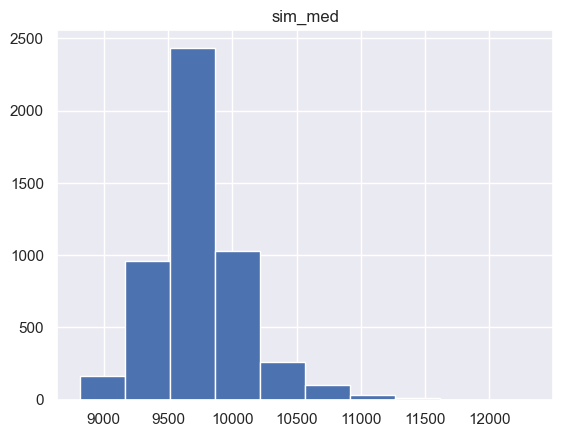

In [159]:
df_null_samp_dist = pd.DataFrame(df_null_samp_dist)
df_null_samp_dist.hist()

In [160]:
df_null_samp_dist.describe()

,sim_med
count,5000.00000
mean,9737.67520
std,369.01691
min,8813.00000
25%,9547.00000
50%,9715.00000
75%,9883.00000
max,12322.00000


In [161]:
(df_null_samp_dist == 1542).mean()

sim_med    0.0
dtype: float64

## 3. Size of Colleges [1 point]

Is the median enrollment for all junior colleges different from the median enrollment for all colleges, universities, and professional schools?  Use a significance level of 1%.

Generate the simulation-based sampling distribution for our statistic of interest.  Be sure to calculate any differences as junior college - colleges, universities, and professional schools.  

H0: Median enrollment of all junior college = median enrollment for all c.u.p. schools

Ha: Median enrollment of all junior college = median enrollment for all c.u.p. schools

In [162]:
df_junior = df[ df.naics_desc == 'Junior Colleges']
df_uni = df[ df.naics_desc == 'Colleges, Universities, and Professional Schools']
print(f"length of Junior: {len(df_junior)}")
print(f"length of Universities: {len(df_uni)}")

length of Junior: 38
length of Universities: 48


In [163]:
df_new = pd.DataFrame({'shuffled_naics_desc': df['naics_desc'].sample(86, replace = False)})
df_new = df_new.reset_index()
df_new.head()

,index,shuffled_naics_desc
0,47,Junior Colleges
1,127,Junior Colleges
2,81,"Colleges, Universities, and Professional Schools"
3,107,"Colleges, Universities, and Professional Schools"
4,117,Junior Colleges


In [164]:
df_new.shape

(86, 2)

In [165]:
df = df.copy().reset_index()
df

,index,naics_desc,tot_enroll
0,0,"Colleges, Universities, and Professional Schools",1666.0
1,1,Junior Colleges,4216.0
2,2,"Colleges, Universities, and Professional Schools",4391.0
3,3,"Colleges, Universities, and Professional Schools",1508.0
4,5,"Colleges, Universities, and Professional Schools",3407.0
...,...,...,...
81,130,"Colleges, Universities, and Professional Schools",3332.0
82,131,"Colleges, Universities, and Professional Schools",1400.0
83,132,"Colleges, Universities, and Professional Schools",529.0
84,133,"Colleges, Universities, and Professional Schools",981.0


In [166]:
df_new['tot_enroll'] = df['tot_enroll']
df_new

,index,shuffled_naics_desc,tot_enroll
0,47,Junior Colleges,1666.0
1,127,Junior Colleges,4216.0
2,81,"Colleges, Universities, and Professional Schools",4391.0
3,107,"Colleges, Universities, and Professional Schools",1508.0
4,117,Junior Colleges,3407.0
...,...,...,...
81,86,Junior Colleges,3332.0
82,62,"Colleges, Universities, and Professional Schools",1400.0
83,30,Junior Colleges,529.0
84,11,Junior Colleges,981.0


In [182]:
df_new[df_new.shuffled_naics_desc == 'Junior Colleges']['tot_enroll'].median()

1662.0

In [183]:
df_new[df_new.shuffled_naics_desc == 'Colleges, Universities, and Professional Schools']['tot_enroll'].median()

1454.0

In [167]:
df_junior['tot_enroll'].median() - df_uni['tot_enroll'].median()

-649.0

In [184]:
df_diff_sim = []
for i in range(5000):
    df_new = pd.DataFrame({'shuffled_naics_desc': df['naics_desc'].sample(86, replace = False)})
    df_new = df_new.reset_index()
    df_new['tot_enroll'] = df['tot_enroll']
    med_jun = df_new[df_new.shuffled_naics_desc == 'Junior Colleges']['tot_enroll'].median()
    med_uni = df_new[df_new.shuffled_naics_desc == 'Colleges, Universities, and Professional Schools']['tot_enroll'].median()
    d = {"med_diff" : med_jun - med_uni}
    df_diff_sim.append(d)

In [186]:
df_diff_sim = pd.DataFrame(df_diff_sim)
df_diff_sim.describe()

,med_diff
count,5000.000000
mean,24.814700
std,701.546598
min,-2390.000000
25%,-444.500000
50%,-9.000000
75%,448.500000
max,2532.500000


In [190]:
(df_diff_sim <= -649).mean() + (df_diff_sim >= 649).mean()

med_diff    0.333
dtype: float64

array([[<Axes: title={'center': 'med_diff'}>]], dtype=object)

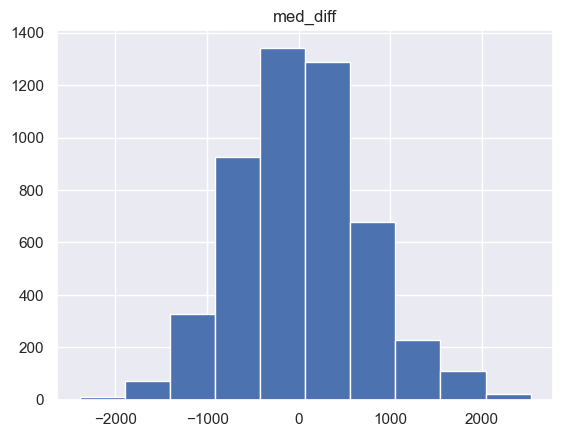

In [187]:
df_diff_sim.hist()

In [188]:
(df_diff_sim <= -649).mean()

med_diff    0.1592
dtype: float64

In [189]:
(df_diff_sim >= 649).mean()

med_diff    0.1738
dtype: float64

Remember to keep all your cells and hit the save icon above periodically to checkpoint (save) your results on your local computer. Once you are satisified with your results restart the kernel and run all (Kernel -> Restart & Run All). **Make sure nothing has changed**. Checkpoint and exit (File -> Save and Checkpoint + File -> Close and Halt). Follow the instructions on the Homework 6 Canvas Assignment to submit your notebook to GitHub.